In [100]:
# importing required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

sns.set(rc={'figure.figsize':(8,8)})

In [92]:
# reading in our initial dataset
df = pd.read_csv("covidtesting.csv")
df.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,...,Number of patients in ICU on a ventilator due to COVID-19,Num. of patients in ICU on a ventilator testing positive,Num. of patients in ICU on a ventilator testing negative,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7,Total_Lineage_B.1.351,Total_Lineage_P.1
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.set_index('Reported Date')
df.head()

,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Percent positive tests in last day,...,Number of patients in ICU on a ventilator due to COVID-19,Num. of patients in ICU on a ventilator testing positive,Num. of patients in ICU on a ventilator testing negative,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7,Total_Lineage_B.1.351,Total_Lineage_P.1
Reported Date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 2020-01-26 to 2021-04-19
Data columns (total 25 columns):
Confirmed Negative                                           47 non-null float64
Presumptive Negative                                         12 non-null float64
Presumptive Positive                                         25 non-null float64
Confirmed Positive                                           437 non-null float64
Resolved                                                     427 non-null float64
Deaths                                                       399 non-null float64
Total Cases                                                  437 non-null float64
Total patients approved for testing as of Reporting Date     433 non-null float64
Total tests completed in the last day                        370 non-null float64
Percent positive tests in last day                           366 non-null float64
Under Investigation                                          439 no

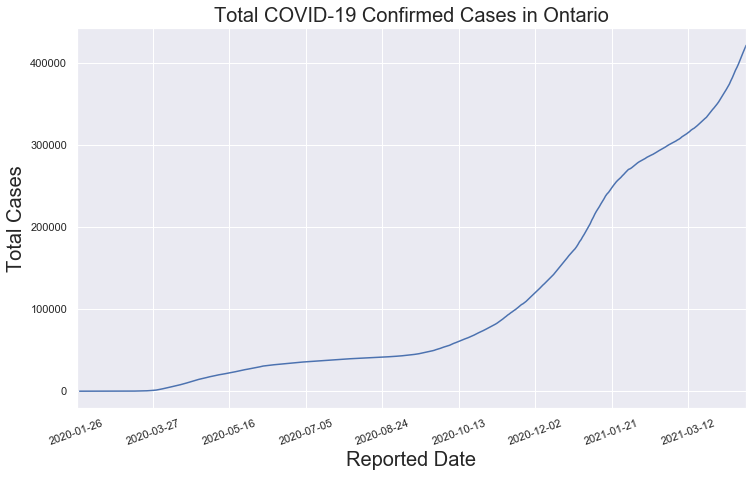

In [5]:
# plotting total confirmed cases
df['Total Cases'].plot(figsize=(12,7))
plt.ylabel('Total Cases', fontsize=20)
plt.xlabel('Reported Date', fontsize=20)
plt.xticks(rotation=20)
plt.title('Total COVID-19 Confirmed Cases in Ontario', fontsize=20)
plt.show()

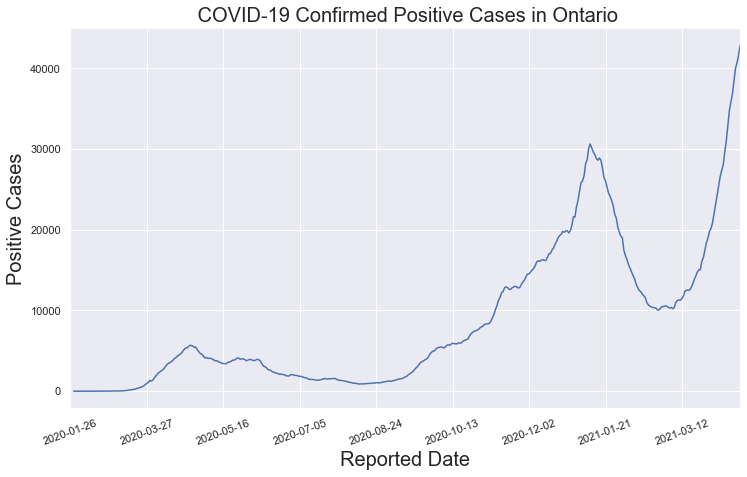

In [6]:
# plotting confirmed positive case numbers
df['Confirmed Positive'].plot(figsize=(12,7))
plt.ylabel('Positive Cases', fontsize=20)
plt.xlabel('Reported Date', fontsize=20)
plt.xticks(rotation=20)
plt.title(' COVID-19 Confirmed Positive Cases in Ontario', fontsize=20)
plt.show()

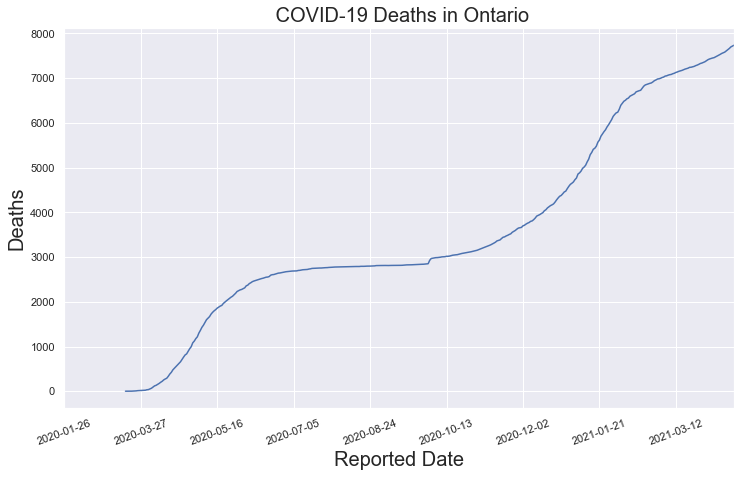

In [7]:
# plotting deaths
df['Deaths'].plot(figsize=(12,7))
plt.ylabel('Deaths', fontsize=20)
plt.xlabel('Reported Date', fontsize=20)
plt.xticks(rotation=20)
plt.title(' COVID-19 Deaths in Ontario', fontsize=20)
plt.show()

## Cleaning our Data
- outliers
- incorrect/missing information

## Data Examination
- seasonality
- stationarity
- split into train and test set

## Models to Implement
- Linear Regression
- ARIMA/ARMA
- Decision Tree
- Neural Network

## Evaluation
- compare which models are best
- rank performance of each model

In [8]:
# creating a copy of our dataset only containing the confirmed positive cases
cases = df.copy()

for element in cases.columns:
    if element == 'Confirmed Positive':
        continue
    else:
        cases = cases.drop([str(element)], axis=1)
        
cases.head()

,Confirmed Positive
Reported Date,
2020-01-26,NaN
2020-01-27,NaN
2020-01-28,1.0
2020-01-30,2.0
2020-01-31,2.0


In [9]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 2020-01-26 to 2021-04-19
Data columns (total 1 columns):
Confirmed Positive    437 non-null float64
dtypes: float64(1)
memory usage: 6.9+ KB


In [10]:
# checking if we have any missing/null values
cases.isna().sum()

Confirmed Positive    2
dtype: int64

In [11]:
# filling our null values with the value of 0
cases = cases.fillna(0)
cases.head()

,Confirmed Positive
Reported Date,
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,1.0
2020-01-30,2.0
2020-01-31,2.0


In [12]:
# performing feature engineering
cases2 = cases.copy()
cases2.reset_index(level=0, inplace=True)
cases2.reset_index(level=0, inplace=True)
cases2.rename(columns={'index':'days_from_start'}, inplace=True)
cases2['Reported Date'] = pd.to_datetime(cases2['Reported Date'])
cases2['month'] = pd.DatetimeIndex(cases2['Reported Date']).month
cases2['day'] = pd.DatetimeIndex(cases2['Reported Date']).day
cases2['quarter'] = pd.DatetimeIndex(cases2['Reported Date']).quarter

In [13]:
cases2.head()

,days_from_start,Reported Date,Confirmed Positive,month,day,quarter
0,0,2020-01-26,0.0,1,26,1
1,1,2020-01-27,0.0,1,27,1
2,2,2020-01-28,1.0,1,28,1
3,3,2020-01-30,2.0,1,30,1
4,4,2020-01-31,2.0,1,31,1


In [14]:
# getting dummy variables for all categorical variables
cases2 = pd.get_dummies(cases2, columns=['month'], drop_first=True, prefix='month')
cases2 = pd.get_dummies(cases2, columns=['quarter'], drop_first=True, prefix='quarter')
cases2.head()

,days_from_start,Reported Date,Confirmed Positive,day,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4
0,0,2020-01-26,0.0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2020-01-27,0.0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2020-01-28,1.0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2020-01-30,2.0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2020-01-31,2.0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# drop unnecessary column
cases2 = cases2.drop(['Reported Date'], axis=1)
cases2.head()

,days_from_start,Confirmed Positive,day,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4
0,0,0.0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2.0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2.0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
temp = []
train = int(len(cases2)*0.7)
for i in range(len(cases2)):
    if i < train:
        temp.append(True)
    else:
        temp.append(False)

In [17]:
cases2['Train'] = temp

In [18]:
cases2.head()

,days_from_start,Confirmed Positive,day,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4,Train
0,0,0.0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
1,1,0.0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
2,2,1.0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
3,3,2.0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
4,4,2.0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


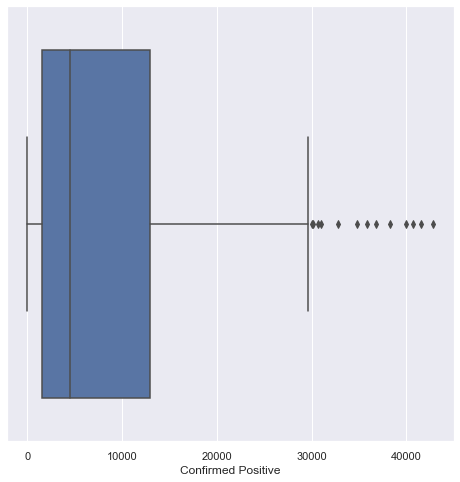

In [19]:
# plot boxplot
sns.boxplot(x=cases['Confirmed Positive'])
plt.show()
# this boxplot shows that there a several values considered to be outliers
# although given the recent exponential spike in confirmed cases, these values fall out of our distribution but are valid observations

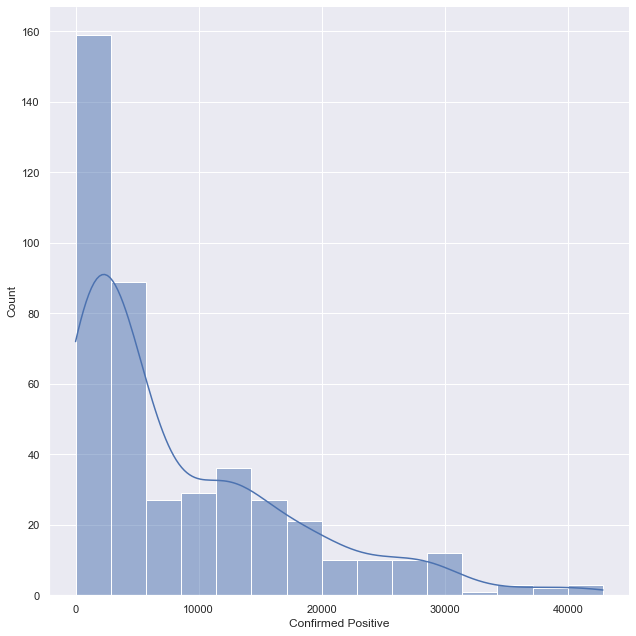

In [20]:
# plot histogram with kernel density estimation
sns.displot(data=cases, x='Confirmed Positive', kde=True, height=9, aspect=1)
plt.show()

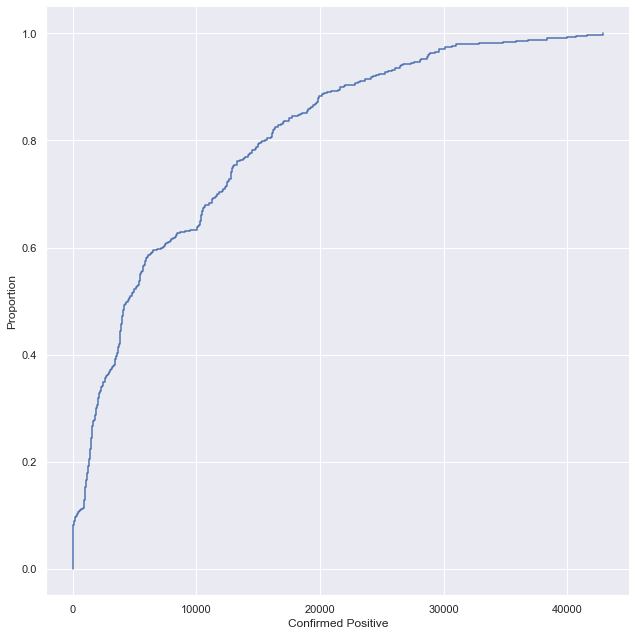

In [21]:
# empirical cumulative distribution function
# this is a different take on the data compared to histograms and box plots as each data point
# is observed individually, with no binning or smoothing
sns.displot(data=cases, x='Confirmed Positive', kind='ecdf', height=9, aspect=1)

Looking at these graphs, we can visually determine that there is no seasonality and no outliers. Additionally, we can also determine there exists no stationarity in our data.

In [102]:
# confirming there exists no stationarity with an Augmented Dickey-Fuller test
dftest = adfuller(cases['Confirmed Positive'])
print("ADF: ", dftest[0])
print("P-Value: ", dftest[1])

ADF:  -0.45974612421777905
P-Value:  0.8996353040183678


## Creating our Training/Testing Data

In [22]:
train = cases2[cases2['Train'] == True]
test = cases2[cases2['Train'] == False]

In [23]:
print(train.shape)
print(test.shape)

(307, 18)
(132, 18)


In [24]:
train = train.drop(['Train'], axis=1)
test = test.drop(['Train'], axis=1)

In [25]:
target_train = ['Confirmed Positive']
predictors_train = list(set(list(train.columns))-set(target_train))

X_train = train[predictors_train].values
y_train = train[target_train].values

In [26]:
target_test = ['Confirmed Positive']
predictors_test = list(set(list(train.columns))-set(target_train))

X_test = test[predictors_test].values
y_test = test[target_test].values

In [61]:
# creating appropriate data for ARIMA model
data = cases.copy()
data.reset_index(level=0, inplace=True)
data.reset_index(level=0, inplace=True)
data.columns = ['days_from_start', 'reported_date', 'confirmed_positive']
X = data['days_from_start'].values.reshape(-1,1)
y = data['confirmed_positive'].values
X_train_arima = X[:int(X.shape[0]*0.7)]
X_test_arima = X[int(X.shape[0]*0.7):]
y_train_arima = y[:int(X.shape[0]*0.7)]
y_test_arima = y[int(X.shape[0]*0.7):]

## Fitting our Models

In [53]:
# getting our train test split of data at a 80/20 ratio
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [94]:
# creating and fitting our linear regresesion model
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

In [97]:
print("Linear Regression R^2 Value: ", lin_reg.score(X_test, y_test))

Linear Regression R^2 Value:  -34.848420283010036


In [96]:
# creating and fitting our decision tree model
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=5)
dec_tree = dec_tree.fit(X_train, y_train)

In [98]:
print("Decision Tree R^2 Value: ", dec_tree.score(X_test, y_test))

Decision Tree R^2 Value:  -0.20267073743266217


In [29]:
# creating and fitting our MLP model
regr = MLPRegressor(random_state=1, max_iter=5000)
regr = regr.fit(X_train, np.ravel(y_train))

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [99]:
print("MLP R^2 Value: ", regr.score(X_test, y_test))

MLP R^2 Value:  -0.7593680145693482


In [52]:
# performing stepwise search over entire dataset to find best parameters to minimize AIC for ARIMA model
stepwise_fit = auto_arima(cases['Confirmed Positive'], trace=True, surpress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=5963.357, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6071.701, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=6006.911, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5960.861, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=5959.886, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=5961.393, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5961.352, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5959.625, Time=0.02 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=5961.339, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=5962.457, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5961.141, Time=0.09 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.728 seconds


In [54]:
# creating and training ARIMA model
arima = ARIMA(y_train_arima, order=(0,2,2))
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  307
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -1830.071
Date:                Tue, 20 Apr 2021   AIC                           3666.141
Time:                        18:08:19   BIC                           3677.302
Sample:                             0   HQIC                          3670.605
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4418      0.036    -12.208      0.000      -0.513      -0.371
ma.L2         -0.1267      0.035     -3.616      0.000      -0.195      -0.058
sigma2      9523.7266    514.059     18.527      0.000    8516.189    1.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                99.74
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
start = len(y_train_arima)
end = start + len(y_test_arima) - 1
arima_pred = arima.predict(start=start, end=end, typ='levels')

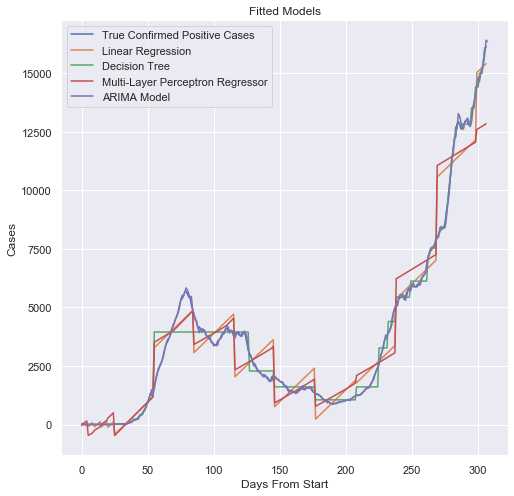

In [69]:
plt.plot(y_train, label='True Confirmed Positive Cases')
plt.plot(lin_reg.predict(X_train), label='Linear Regression')
plt.plot(dec_tree.predict(X_train), label='Decision Tree')
plt.plot(regr.predict(X_train), label='Multi-Layer Perceptron Regressor')
plt.plot(arima.predict(start=0, end=len(y_train_arima)), label='ARIMA Model')
plt.title("Fitted Models")
plt.ylabel("Cases")
plt.xlabel("Days From Start")
plt.legend()

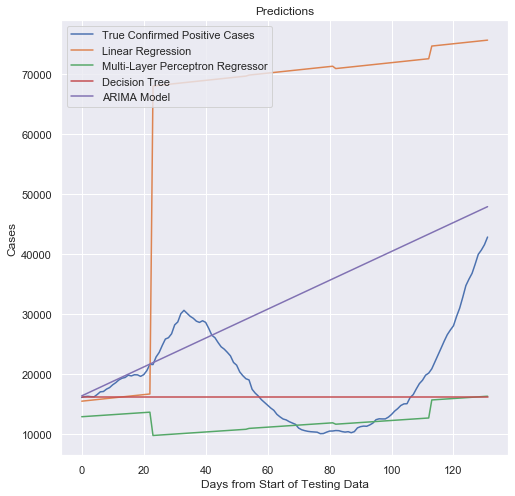

In [91]:
plt.plot(y_test, label='True Confirmed Positive Cases')
plt.plot(lin_reg.predict(X_test), label='Linear Regression')
plt.plot(regr.predict(X_test), label='Multi-Layer Perceptron Regressor')
plt.plot(dec_tree.predict(X_test), label='Decision Tree')
plt.plot(arima.predict(start=len(y_train_arima), end=(len(y_train_arima)+len(y_test_arima)-1)), label='ARIMA Model')
plt.title("Predictions")
plt.legend(loc='upper left')
plt.xlabel("Days from Start of Testing Data")
plt.ylabel("Cases")
plt.show()

## Evaluating Our Models

In [73]:
def rmse(actual, predicted):
    total = 0
    for i in range(len(actual)):
        temp = (predicted[i] - actual[i])**2
        total += temp
    rmse = np.sqrt(total / len(actual))
    return rmse

In [74]:
lin_reg_prediction = lin_reg.predict(X_test)
mlp_prediction = regr.predict(X_test)
dec_tree_prediction = dec_tree.predict(X_test)
arima_prediction = arima.predict(start=len(y_train_arima), end=(len(y_train_arima)+len(y_test_arima)-1))

In [85]:
lin_reg_rmse = rmse(y_test, lin_reg_prediction)
mlp_rmse = rmse(y_test, mlp_prediction)
dec_tree_rmse = rmse(y_test, dec_tree_prediction)
arima_rmse = rmse(y_test, arima_prediction)

In [88]:
print("Linear Regression RMSE: ", lin_reg_rmse)
print("Multi-Layer Perceptron Regressor RMSE: ", mlp_rmse)
print("Decision Tree RMSE: ", dec_tree_rmse)
print("ARIMA RMSE: ", arima_rmse)

Linear Regression RMSE:  [47295.1893247]
Multi-Layer Perceptron Regressor RMSE:  [10477.56353726]
Decision Tree RMSE:  [8662.74098226]
ARIMA RMSE:  [17007.04733201]


Looking at the RMSE values of each of our models, we can rank our models in the following order, from the best to worst model performance:
1. Decision Tree
2. Multi-Layer Perceptron Regressor
3. ARIMA Model
4. Linear Regression